In [3]:
import scipy.io
import numpy as np 
import os 
import scipy.misc 
import matplotlib.pyplot as plt 
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1, 1, 1, 1),
            padding='SAME')
    return tf.nn.bias_add(conv, bias)
def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1),
            padding='SAME')
def preprocess(image, mean_pixel):
    return image - mean_pixel
def unprocess(image, mean_pixel):
    return image + mean_pixel
def imread(path):
    return scipy.misc.imread(path).astype(np.float)
def imsave(path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)
print ("Functions for VGG ready")

Functions for VGG ready


把咱们自定义的层的名字和已有的vgg参数对应起来

In [5]:
def net(data_path, input_image):
    layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1',
        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',
        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',
        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
    )
    # 用scipy.io加载vgg模型文件
    data = scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    mean_pixel = np.mean(mean, axis=(0, 1))
    weights = data['layers'][0]
    # 保存每一层前向传播的结果
    net = {}
    current = input_image
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind == 'conv':
            kernels, bias = weights[i][0][0][0][0] # 权重和偏置
            # matconvnet: weights are [width, height, in_channels, out_channels]
            # tensorflow: weights are [height, width, in_channels, out_channels]
            # 转为为tensorflow的书写格式
            kernels = np.transpose(kernels, (1, 0, 2, 3))
            bias = bias.reshape(-1)
            current = _conv_layer(current, kernels, bias)
        elif kind == 'relu':
            current = tf.nn.relu(current)
        elif kind == 'pool':
            current = _pool_layer(current)
        # net保存前向传播后的各层的参数值
        net[name] = current
    assert len(net) == len(layers)
    return net, mean_pixel, layers
print ("Network for VGG ready")

Network for VGG ready


In [6]:
# 找到当前路径
cwd  = os.getcwd()
# VGG_PATH的绝对路径
VGG_PATH = cwd + "/data/imagenet-vgg-verydeep-19.mat"
# 读入vgg参数
data = scipy.io.loadmat(VGG_PATH)
# 查看所有的键
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'layers', 'classes', 'normalization'])


In [ ]:
data["layers"]

In [8]:
# 由于vgg本身在训练的时候有减均值的操作，所以测试的时候也要减去均值
mean = data['normalization'][0][0][0]
mean_pixel = np.mean(mean, axis=(0, 1))
print(mean_pixel)

weights = data['layers'][0]
#print(weights)

# 取出卷积层的参数w和b，w和b成对存的，conv_1 w
print(weights[0][0][0][0][0][0].shape) # 一层一层的试，打印shape看是不是我们想要的权重
# conv_1 b
print(weights[0][0][0][0][0][1].shape)

[123.68  116.779 103.939]
(3, 3, 3, 64)
(1, 64)


In [9]:
data['layers'][0][2][0][0][0][0][0].shape

(3, 3, 64, 64)

[1/36] conv1_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 750, 1200, 64)


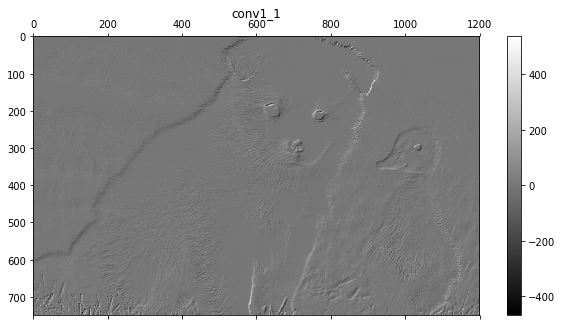

[2/36] relu1_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 750, 1200, 64)


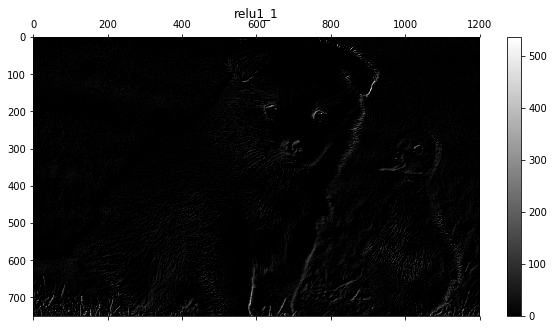

[3/36] conv1_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 750, 1200, 64)


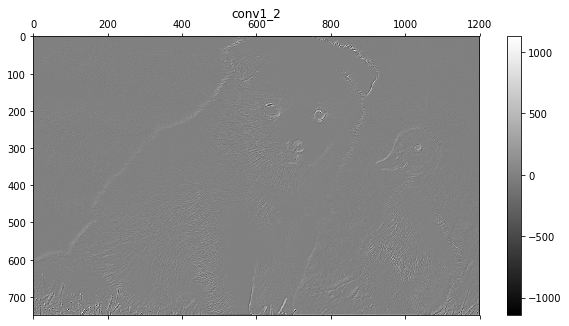

[4/36] relu1_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 750, 1200, 64)


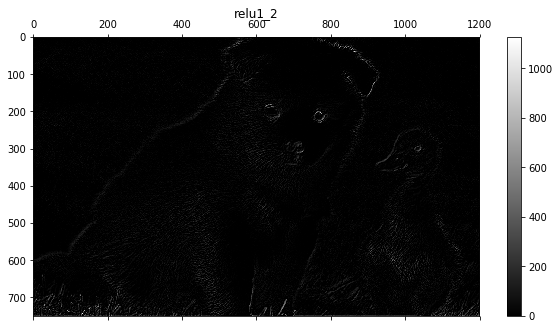

[5/36] pool1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 375, 600, 64)


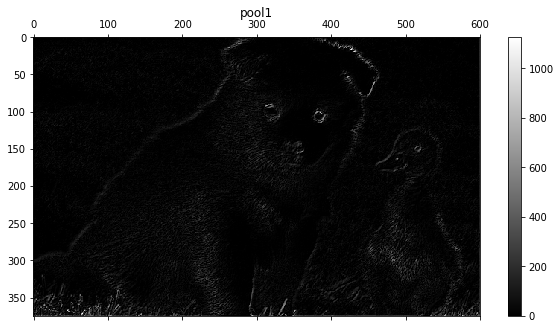

[6/36] conv2_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 375, 600, 128)


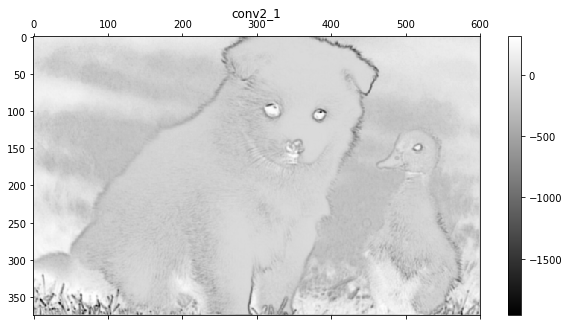

[7/36] relu2_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 375, 600, 128)


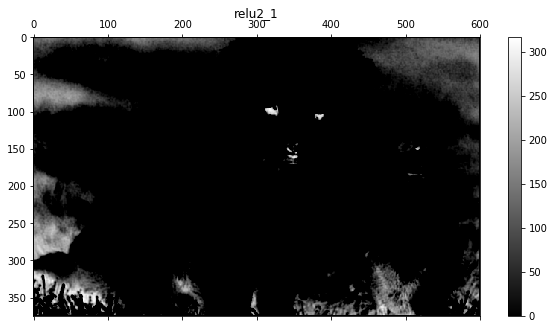

[8/36] conv2_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 375, 600, 128)


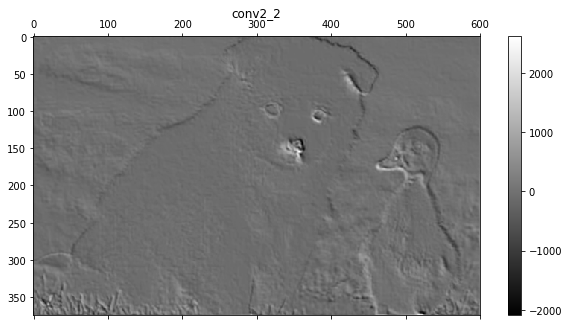

[9/36] relu2_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 375, 600, 128)


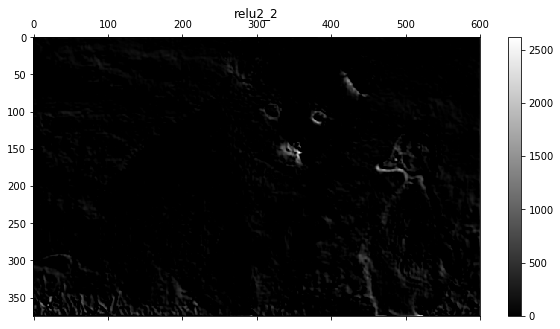

[10/36] pool2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 128)


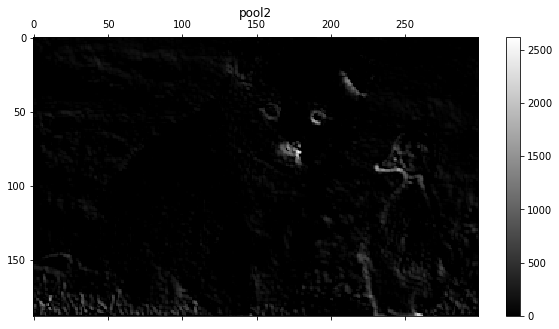

[11/36] conv3_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


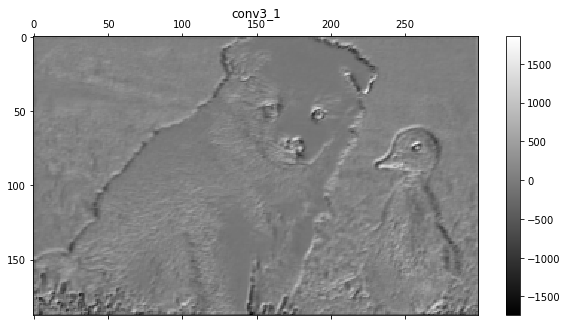

[12/36] relu3_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


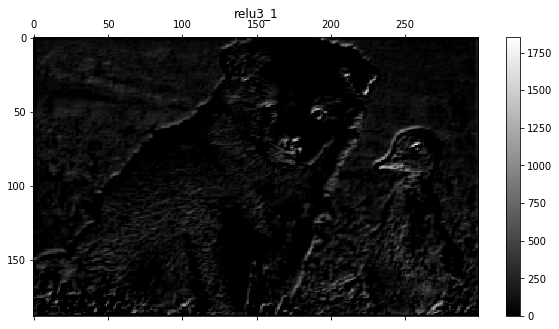

[13/36] conv3_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


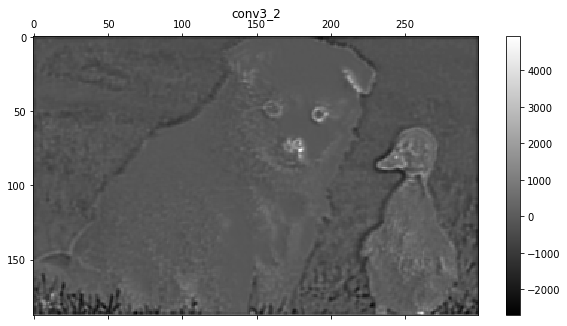

[14/36] relu3_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


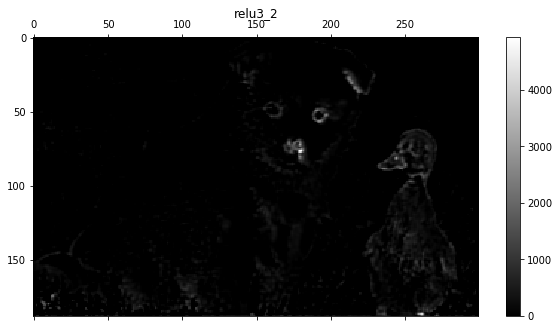

[15/36] conv3_3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


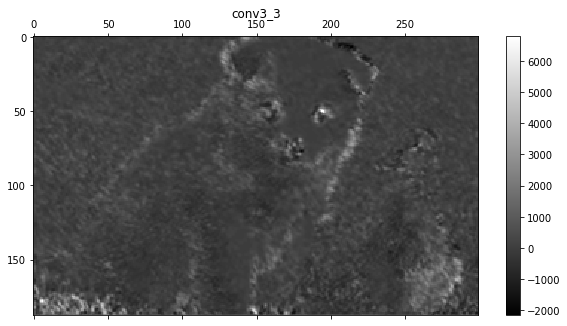

[16/36] relu3_3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


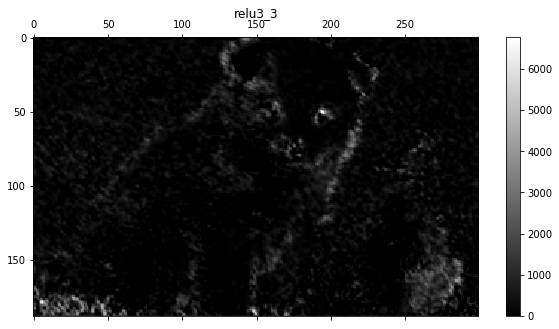

[17/36] conv3_4
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


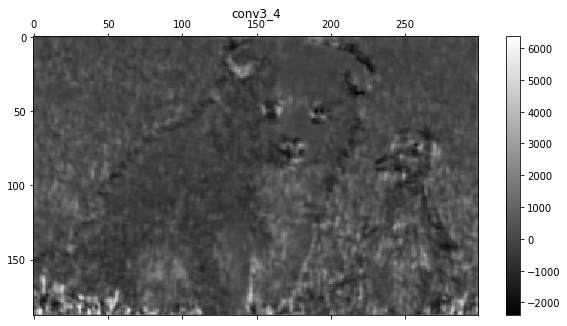

[18/36] relu3_4
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 188, 300, 256)


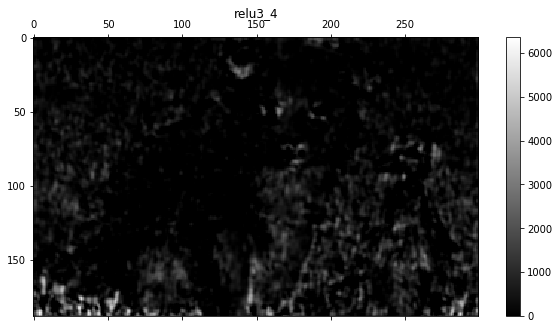

[19/36] pool3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 256)


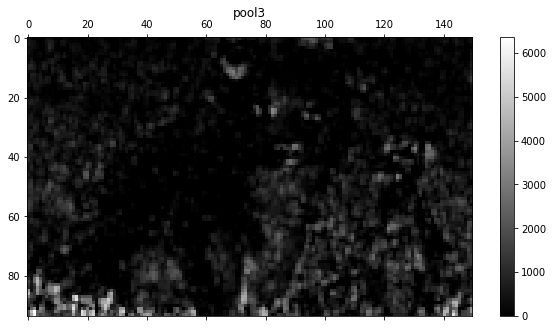

[20/36] conv4_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


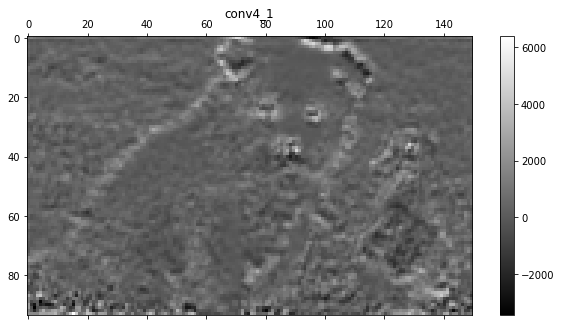

[21/36] relu4_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


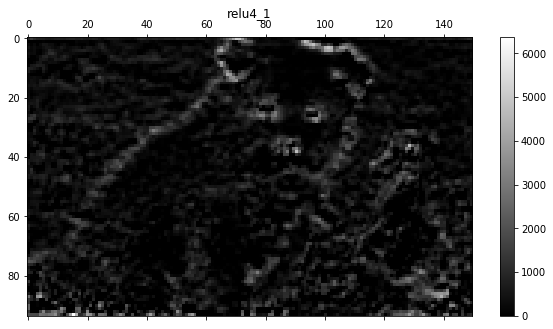

[22/36] conv4_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


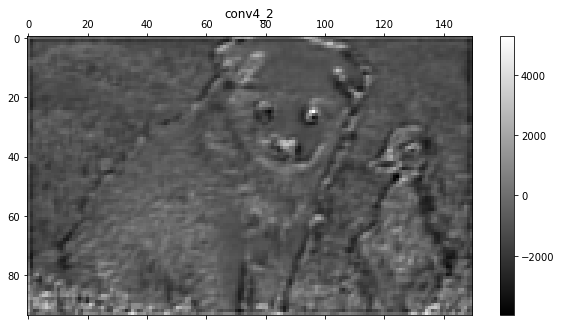

[23/36] relu4_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


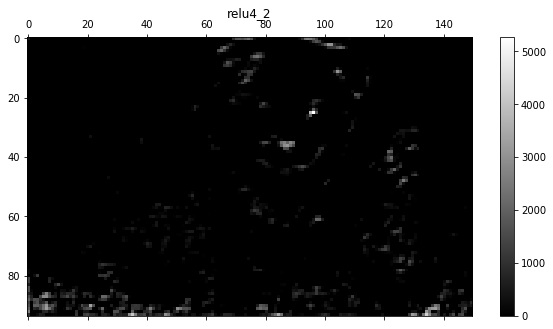

[24/36] conv4_3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


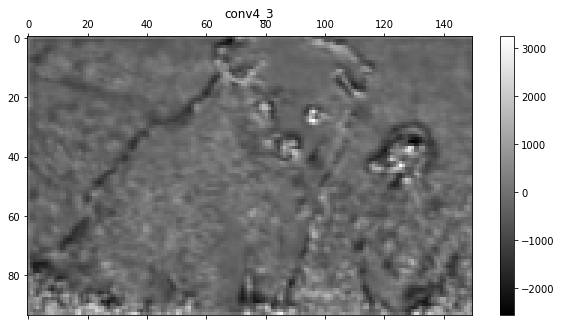

[25/36] relu4_3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


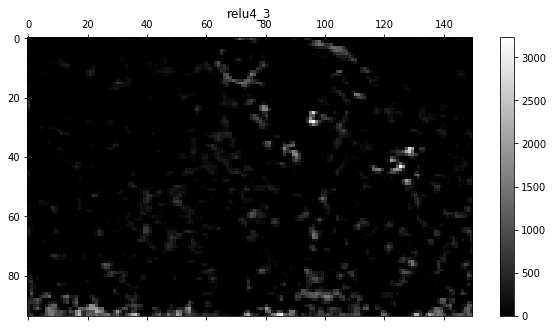

[26/36] conv4_4
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


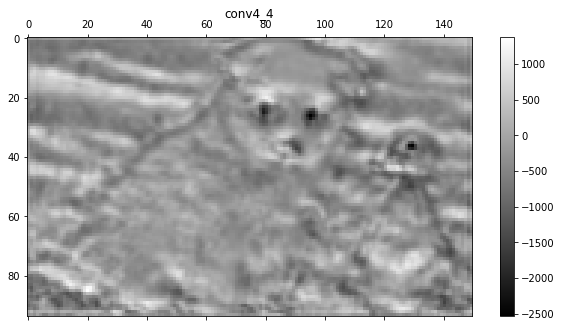

[27/36] relu4_4
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 94, 150, 512)


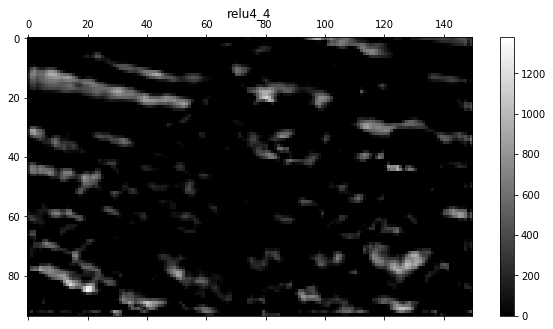

[28/36] pool4
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


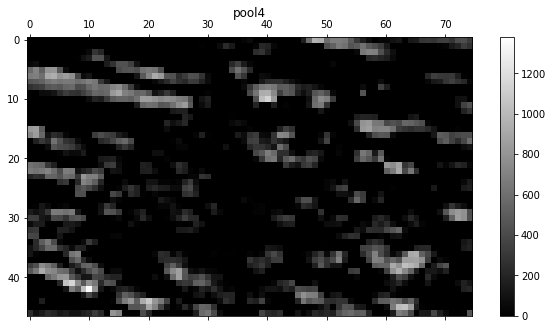

[29/36] conv5_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


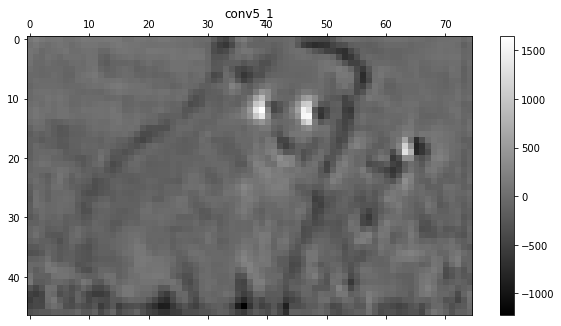

[30/36] relu5_1
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


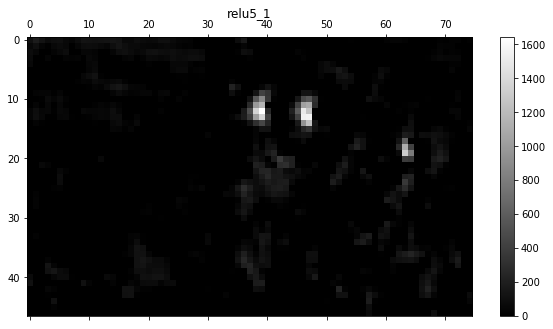

[31/36] conv5_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


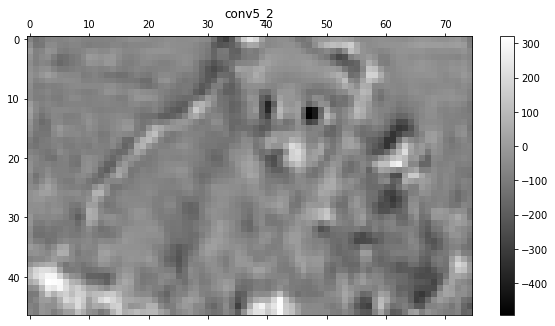

[32/36] relu5_2
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


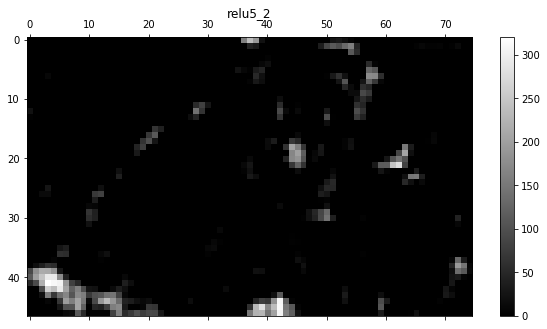

[33/36] conv5_3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


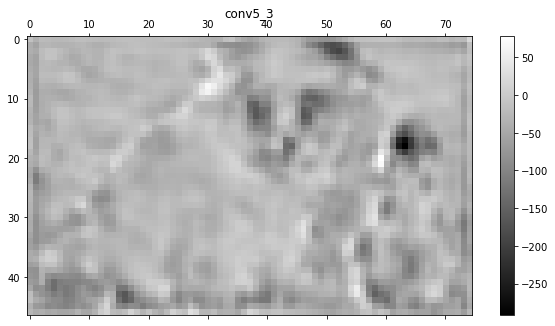

[34/36] relu5_3
 Type of 'features' is  <class 'numpy.ndarray'>
 Shape of 'features' is (1, 47, 75, 512)


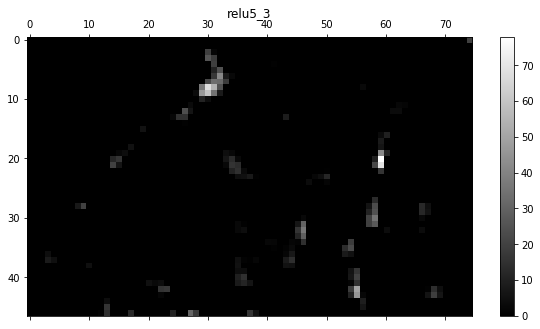

[35/36] conv5_4


ResourceExhaustedError: OOM when allocating tensor with shape[1,64,750,1200] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D_1 = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Relu, Const_1)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: BiasAdd_15/_139 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_125_BiasAdd_15", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'Conv2D_1', defined at:
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-4264d830374b>", line 11, in <module>
    nets, mean_pixel, all_layers = net(VGG_PATH, image)
  File "<ipython-input-5-1f80f11502a4>", line 29, in net
    current = _conv_layer(current, kernels, bias)
  File "<ipython-input-4-9668eb6dd45d>", line 3, in _conv_layer
    padding='SAME')
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1042, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,64,750,1200] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D_1 = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Relu, Const_1)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: BiasAdd_15/_139 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_125_BiasAdd_15", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [10]:
cwd  = os.getcwd()
VGG_PATH = cwd + "/data/imagenet-vgg-verydeep-19.mat"
IMG_PATH = cwd + "/data/dog.jpeg"
input_image = imread(IMG_PATH)
# tensorflow书写格式（样本个数，图片长度，图片高度，通道个数）
shape = (1,input_image.shape[0],input_image.shape[1],input_image.shape[2]) 
with tf.Session() as sess:
    # 输入层img
    image = tf.placeholder('float', shape=shape)
    # 前向计算结果
    nets, mean_pixel, all_layers = net(VGG_PATH, image)
    # 输入层img预处理：减均值
    input_image_pre = np.array([preprocess(input_image, mean_pixel)])
    layers = all_layers # For all layers 
    # layers = ('relu2_1', 'relu3_1', 'relu4_1')
    for i, layer in enumerate(layers):
        print ("[%d/%d] %s" % (i+1, len(layers), layer))
        features = nets[layer].eval(feed_dict={image: input_image_pre})
        
        print (" Type of 'features' is ", type(features))
        print (" Shape of 'features' is %s" % (features.shape,))
        # Plot response 
        if 1:
            plt.figure(i+1, figsize=(10, 5))
            plt.matshow(features[0, :, :, 0], cmap=plt.cm.gray, fignum=i+1)
            plt.title("" + layer)
            plt.colorbar()
            plt.show()